In [2]:
from random import shuffle

from PIL import Image

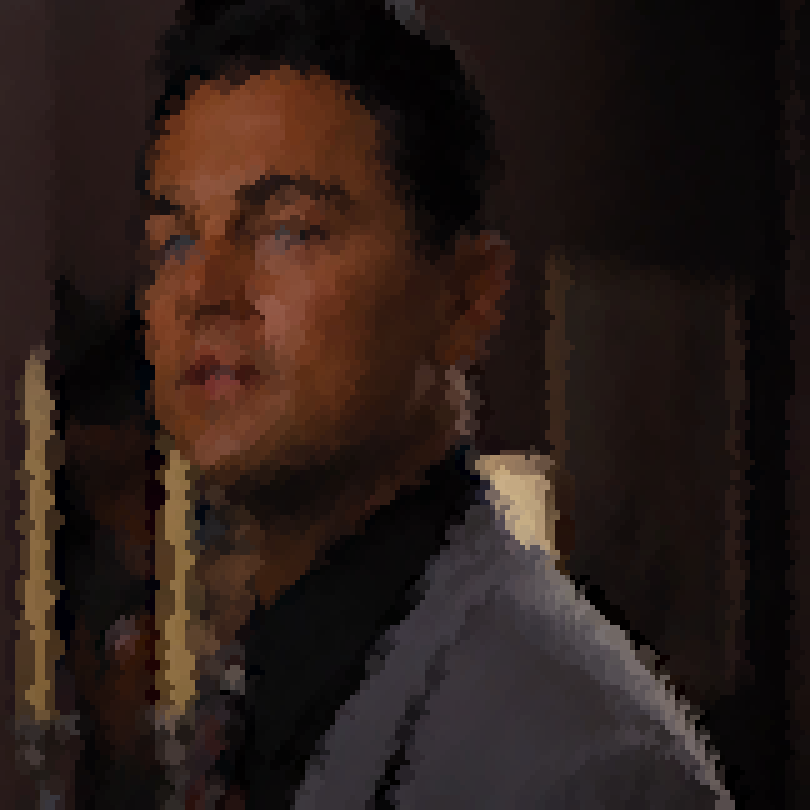

In [19]:
img = Image.open('images/dicaprio.png')
# X_MAX ~ WIDTH
# Y_MAX ~ HEIGHT
X_MAX, Y_MAX = img.size


def extract_colors(img, x_size, y_size):
    """Turn image into 2D array of (r, g, b) tuples."""
    pixels = img.load()
    colors = []
    
    for x in range(x_size):
        row = []
        for y in range(y_size):
            row.append(pixels[x, y])
        colors.append(row)
    return colors


def upscale_image(img, scale):
    """Upscale image by scale factor."""
    width, height = img.size
    new_width = width * scale
    new_height = height * scale

    new_img = Image.new('RGB', (new_width, new_height))
    pixels = new_img.load()

    for x in range(new_width):
        for y in range(new_height):
            orig_x = x // scale
            orig_y = y // scale
            orig_pixel = img.getpixel((orig_x, orig_y))

            pixels[x, y] = orig_pixel

    return new_img


def quantum_shuffle(x_size, y_size):
    """Generate random shuffle of pixel locations using quantum circuit"""
    from qiskit_ibm_provider import IBMProvider
    from qiskit import QuantumCircuit
    
    provider = IBMProvider()

    qc = QuantumCircuit(x_size * y_size) 

    # Apply hadamard gates to create superposition of all basis states
    for i in range(x_size * y_size):
        qc.h(i)

    # Measure to collapse state and get random bitstring
    qc.measure_all()

    # Execute circuit on real quantum computer
    quantum_system = 'ibmq_qasm_simulator'
    backend = provider.get_backend(quantum_system)
    
    # Submit a job.
    job = backend.run(qc, shots=1)
    job.result()
    result = job.result()

    # Convert bitstring to list of pixel locations
    bits = result.get_counts()
    bitstring = next(iter(bits)) 
    pixels = [(x, y) for y in range(y_size) for x in range(x_size)]
    shuffled = [pixels[i] for i in range(len(bitstring)) if bitstring[i]=='1']

    return shuffled


def _stamp_in_location(img, location, y_max, x_max, color):
    """Do a single stamp in a specified location."""
    y, x = location
    pixels = img.load()
    
    # those will always fit
    pixels[x*2, y*2] = color
    pixels[x*2, y*2+1] = color
    pixels[x*2+1, y*2] = color
    pixels[x*2+1, y*2+1] = color
    
    # those might not fit near the edges
    if x != 0:
        pixels[x*2-1, y*2] = color
        pixels[x*2-1, y*2+1] = color
    
    if y != 0:
        pixels[x*2, y*2-1] = color
        pixels[x*2+1, y*2-1] = color

    if y < y_max - 1:
        pixels[x*2, y*2+2] = color
        pixels[x*2+1, y*2+2] = color
        
    if x < x_max - 1:
        pixels[x*2+2, y*2+1] = color
        pixels[x*2+2, y*2] = color

    return img


def stamp_all(img, original_rgb_list, order, y_max, x_max):
    """Perform all stamping in specified order."""
    two_x_img = upscale_image(img, 2)
    for (x, y) in order:
        img = _stamp_in_location(two_x_img, (x, y), y_max, x_max, color=original_rgb_list[y][x])
    return img

order = quantum_shuffle(X_MAX, Y_MAX)
original_rgb_list = extract_colors(img, X_MAX, Y_MAX)
result = stamp_all(img, original_rgb_list, order, Y_MAX, X_MAX)
upscale_image(result, 5)

In [4]:
import numpy as np
import cv2
from random import shuffle
from PIL import Image
from sklearn.cluster import KMeans
from PIL import Image


def capture_photo_and_save():
    # Open a connection to the camera (0 is the default camera)
    cap = cv2.VideoCapture(0)

    # Capture a frame from the camera
    ret, frame = cap.read()

    # Specify the path to save the photo
    save_path = r"C:\users\Acer\Desktop\0.jpg"

    # Save the frame as an image
    cv2.imwrite(save_path, frame)

    # Release the camera
    cap.release()


def limit_colors(image_path, output_path, num_colors):
    # Load the image
    img = Image.open(image_path)
    img_np = np.array(img)

    # Flatten the image to a 1D array of RGB pixels
    pixels = img_np.reshape(-1, 3)

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=num_colors, random_state=42, n_init=10).fit(pixels)  # Set n_init explicitly
    new_colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    quantized_pixels = new_colors[labels].reshape(img_np.shape).astype(np.uint8)

    # Create a new image with quantized colors
    quantized_img = Image.fromarray(quantized_pixels)

    # Save the new image
    quantized_img.save(output_path)


def extract_colors(img, x_size, y_size):
    """Turn image into 2D array of (r, g, b) tuples."""
    pixels = img.load()
    colors = []
    
    for x in range(x_size):
        row = []
        for y in range(y_size):
            row.append(pixels[x, y])
        colors.append(row)
    return colors


def upscale_image(img, scale):
    """Upscale image by scale factor."""
    width, height = img.size
    new_width = width * scale
    new_height = height * scale

    new_img = Image.new('RGB', (new_width, new_height))
    pixels = new_img.load()

    for x in range(new_width):
        for y in range(new_height):
            orig_x = x // scale
            orig_y = y // scale
            orig_pixel = img.getpixel((orig_x, orig_y))

            pixels[x, y] = orig_pixel

    return new_img


def quantum_shuffle(x_size, y_size):
    """Generate random shuffle of pixel locations using quantum circuit"""
    from qiskit_ibm_provider import IBMProvider
    from qiskit import QuantumCircuit
    
    provider = IBMProvider()

    qc = QuantumCircuit(x_size * y_size) 

    # Apply hadamard gates to create superposition of all basis states
    for i in range(x_size * y_size):
        qc.h(i)

    # Measure to collapse state and get random bitstring
    qc.measure_all()

    # Execute circuit on real quantum computer
    quantum_system = 'ibmq_qasm_simulator'
    backend = provider.get_backend(quantum_system)
    
    # Submit a job.
    job = backend.run(qc, shots=1)
    job.result()
    result = job.result()

    # Convert bitstring to list of pixel locations
    bits = result.get_counts()
    bitstring = next(iter(bits)) 
    pixels = [(x, y) for y in range(y_size) for x in range(x_size)]
    shuffled = [pixels[i] for i in range(len(bitstring)) if bitstring[i]=='1']

    return shuffled


def _stamp_in_location(img, location, y_max, x_max, color):
    """Do a single stamp in a specified location."""
    y, x = location
    pixels = img.load()
    
    # those will always fit
    pixels[x*2, y*2] = color
    pixels[x*2, y*2+1] = color
    pixels[x*2+1, y*2] = color
    pixels[x*2+1, y*2+1] = color
    
    # those might not fit near the edges
    if x != 0:
        pixels[x*2-1, y*2] = color
        pixels[x*2-1, y*2+1] = color
    
    if y != 0:
        pixels[x*2, y*2-1] = color
        pixels[x*2+1, y*2-1] = color

    if y < y_max - 1:
        pixels[x*2, y*2+2] = color
        pixels[x*2+1, y*2+2] = color
        
    if x < x_max - 1:
        pixels[x*2+2, y*2+1] = color
        pixels[x*2+2, y*2] = color

    return img


def stamp_all(img, original_rgb_list, order, y_max, x_max):
    """Perform all stamping in specified order."""
    two_x_img = upscale_image(img, 2)
    for (x, y) in order:
        img = _stamp_in_location(two_x_img, (x, y), y_max, x_max, color=original_rgb_list[y][x])
    return img


capture_photo_and_save()
input_image_path = r"C:\users\Acer\Desktop\0.jpg"
output_image_path = r"C:\users\Acer\Desktop\0_RGB1.jpg"
num_colors = 6  # Specify the number of colors you want to limit to

limit_colors(input_image_path, output_image_path, num_colors)

img = Image.open(r"C:\users\Acer\Desktop\0_RGB1.jpg")

X_MAX, Y_MAX = img.size

order = quantum_shuffle(X_MAX, Y_MAX)
original_rgb_list = extract_colors(img, X_MAX, Y_MAX)
result = stamp_all(img, original_rgb_list, order, Y_MAX, X_MAX).save('Output1.jpg')